In [32]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
colors = np.random.randint(0,255,(n_vars,3))/255

In [49]:
data = pd.read_csv("data/actual/50-E=2.csv")
data = data.iloc[:,1:]
vars = list(data.columns)
n_vars = len(vars)

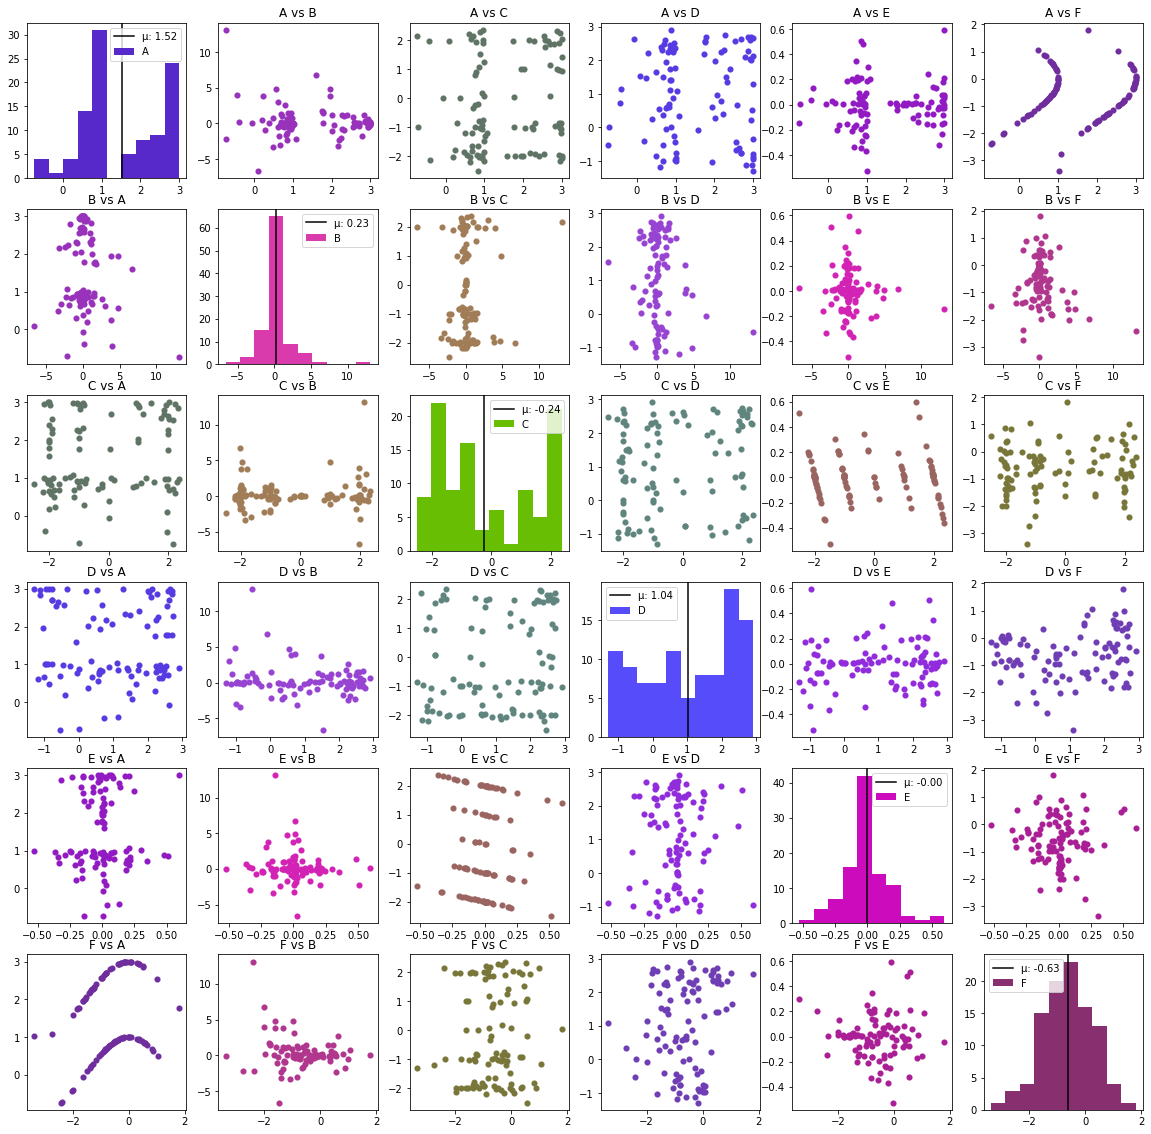

In [44]:
# Pairwise plots
fig, axs = plt.subplots(n_vars,n_vars,figsize=(20,20))


for i,axs_i in enumerate(axs):
    for j,ax in enumerate(axs_i):
        if i != j:
            ax.scatter(data[vars[i]],data[vars[j]],linewidths =0.1,color=(colors[i]+colors[j])/2)
            ax.set_title(f'{vars[i]} vs {vars[j]}')
        else:
            ax.axvline(np.mean(data[vars[i]]), color='black')
            ax.hist(data[vars[i]],color=colors[i])
            ax.legend(labels=[ f'μ: {np.mean(data[vars[i]]):.2f}', vars[i]])

In [51]:
np.std(data['B'][data['B'] > -10])

3.113092648886335

<class 'numpy.ndarray'>


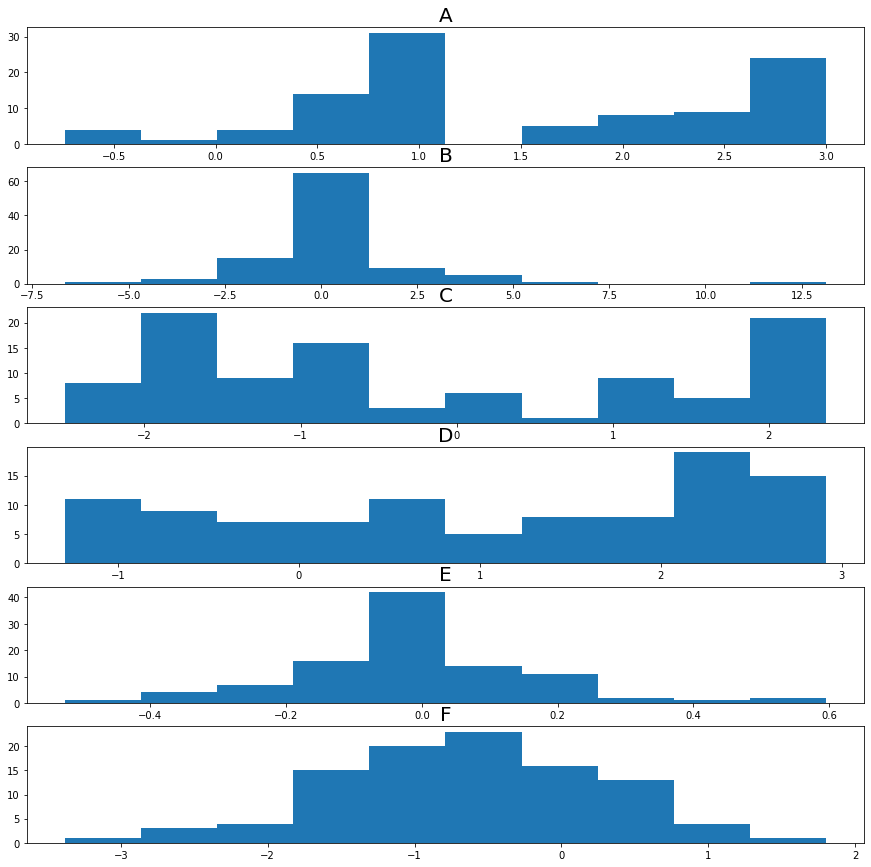

In [4]:
# Normal hists
fig, axs = plt.subplots(n_vars,figsize=(15,15))
print(type(axs))
for i,ax in enumerate(axs):
    ax.hist(data[vars[i]])
    ax.set_title(vars[i], fontsize = 20)

In [24]:
# Linear Correlation
corre_matrix = np.zeros((n_vars,n_vars))
for i in range(n_vars):
    for j in range(n_vars):
        corre_matrix[i,j] = np.round(np.corrcoef(data[vars[i]],data[vars[j]])[0,1],3)
    

corre_matrix

/home/kjb/python-venvs/dtu-signaler-data/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/kjb/python-venvs/dtu-signaler-data/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[1.   , 0.345, 0.083, 0.085,   nan, 0.368],
       [0.345, 1.   , 0.115, 0.073,   nan, 0.189],
       [0.083, 0.115, 1.   , 0.103,   nan, 0.04 ],
       [0.085, 0.073, 0.103, 1.   ,   nan, 0.283],
       [  nan,   nan,   nan,   nan,   nan,   nan],
       [0.368, 0.189, 0.04 , 0.283,   nan, 1.   ]])

In [6]:
def MI(x,y,Nbins=21, names=None):
    bins = np.linspace(np.min(x),np.max(x),Nbins)
    eps=np.spacing(1)
    x_marginal = np.histogram(x,bins=bins)[0]
    x_marginal = x_marginal/x_marginal.sum()
    y_marginal = np.array(np.histogram(y,bins=bins)[0])
    y_marginal = y_marginal/y_marginal.sum()
    xy_joint = np.array(np.histogram2d(x,y,bins=(bins,bins))[0])
    xy_joint = xy_joint/xy_joint.sum()
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(xy_joint.T,origin='lower')
    plt.title('joint')
    plt.subplot(1,2,2)
    plt.imshow((x_marginal[:,None]*y_marginal[None,:]).T,origin='lower')
    plt.title('product of marginals')
    mi=np.sum(xy_joint*np.log(xy_joint/(x_marginal[:,None]*y_marginal[None,:]+eps)+eps))
    if names is None:
        plt.suptitle(f'Mutual information: {mi}')
    else:
        plt.suptitle(f'Mutual information between {names[0]}, {names[1]}: {mi:.3f}')
        plt.savefig(f'./img/{names[0]}-{names[1]}.png')
    return(mi)

<ipython-input-6-7abf94bd3d12>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


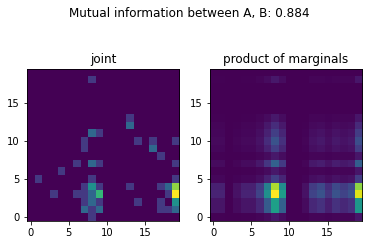

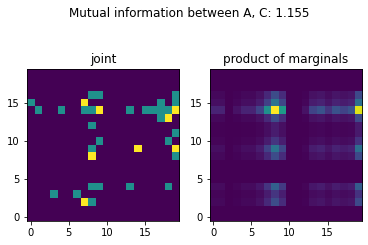

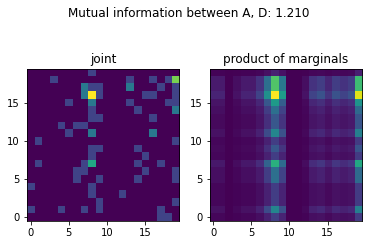

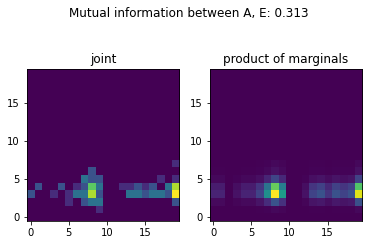

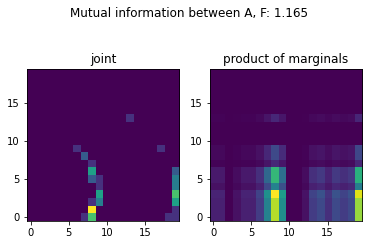

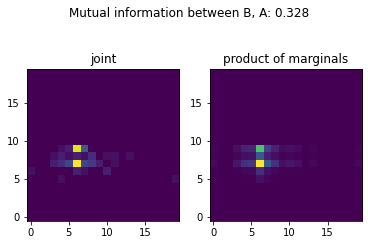

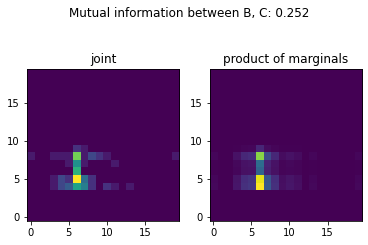

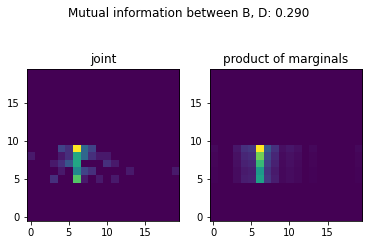

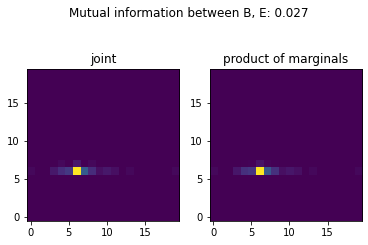

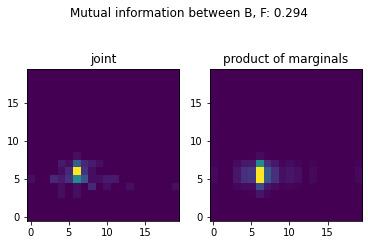

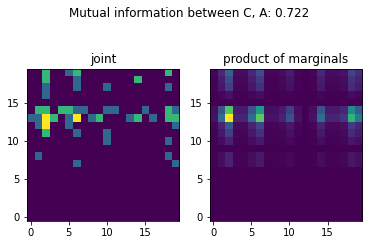

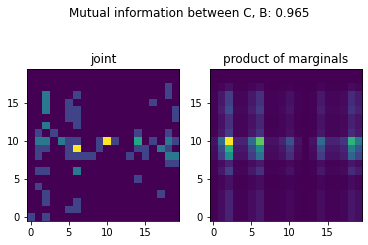

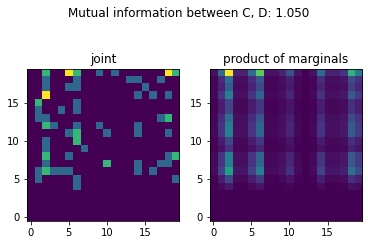

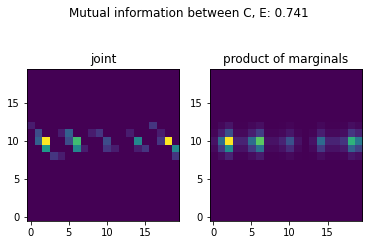

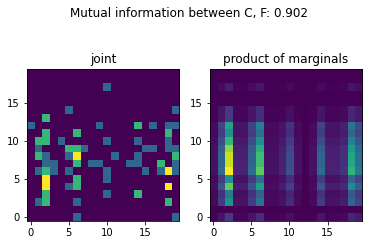

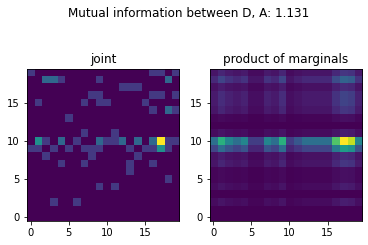

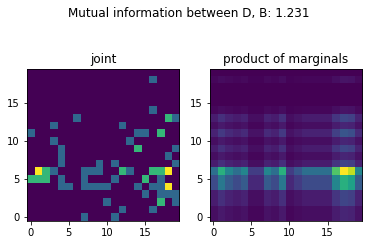

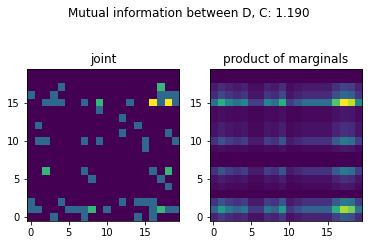

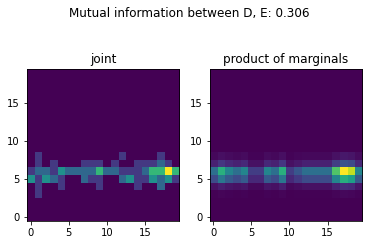

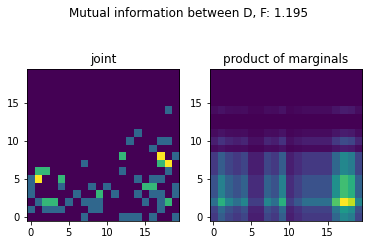

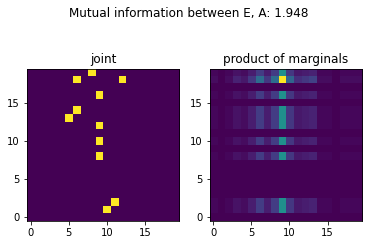

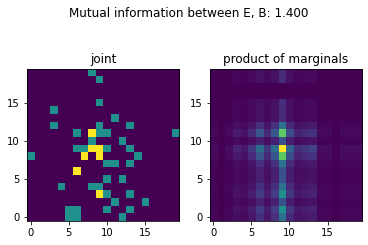

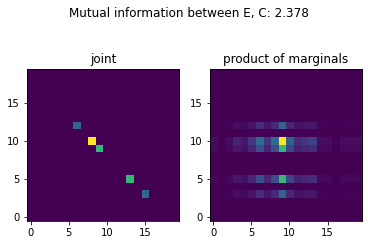

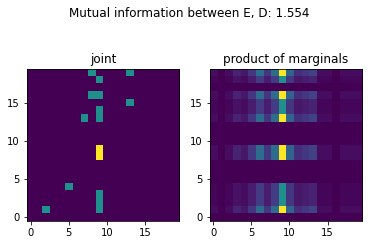

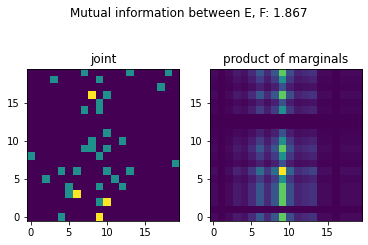

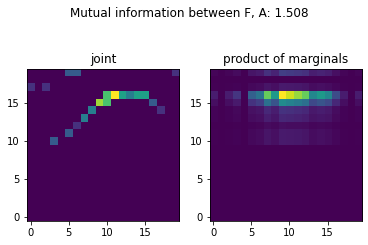

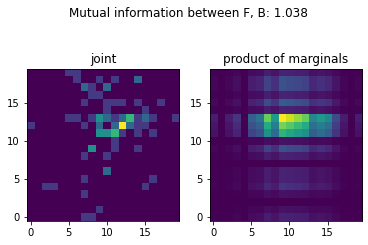

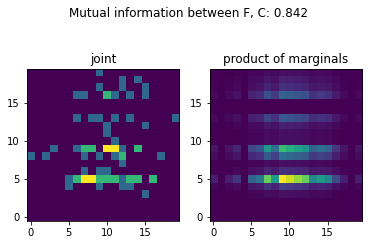

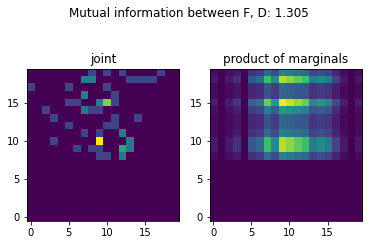

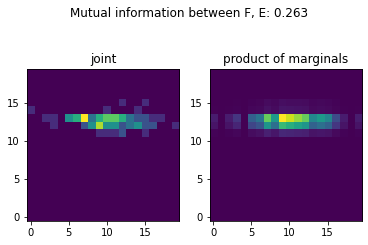

In [7]:
mi = np.zeros((n_vars,n_vars))
names = np.zeros((n_vars,n_vars)).tolist()
for key_i, i in enumerate(vars):
    n = names[key_i]
    for key_j, j in enumerate(vars):
        if j!=i:
            mi[key_i,key_j] = MI(data[i], data[j], names=[i,j])
        n[key_j] = (i,j)

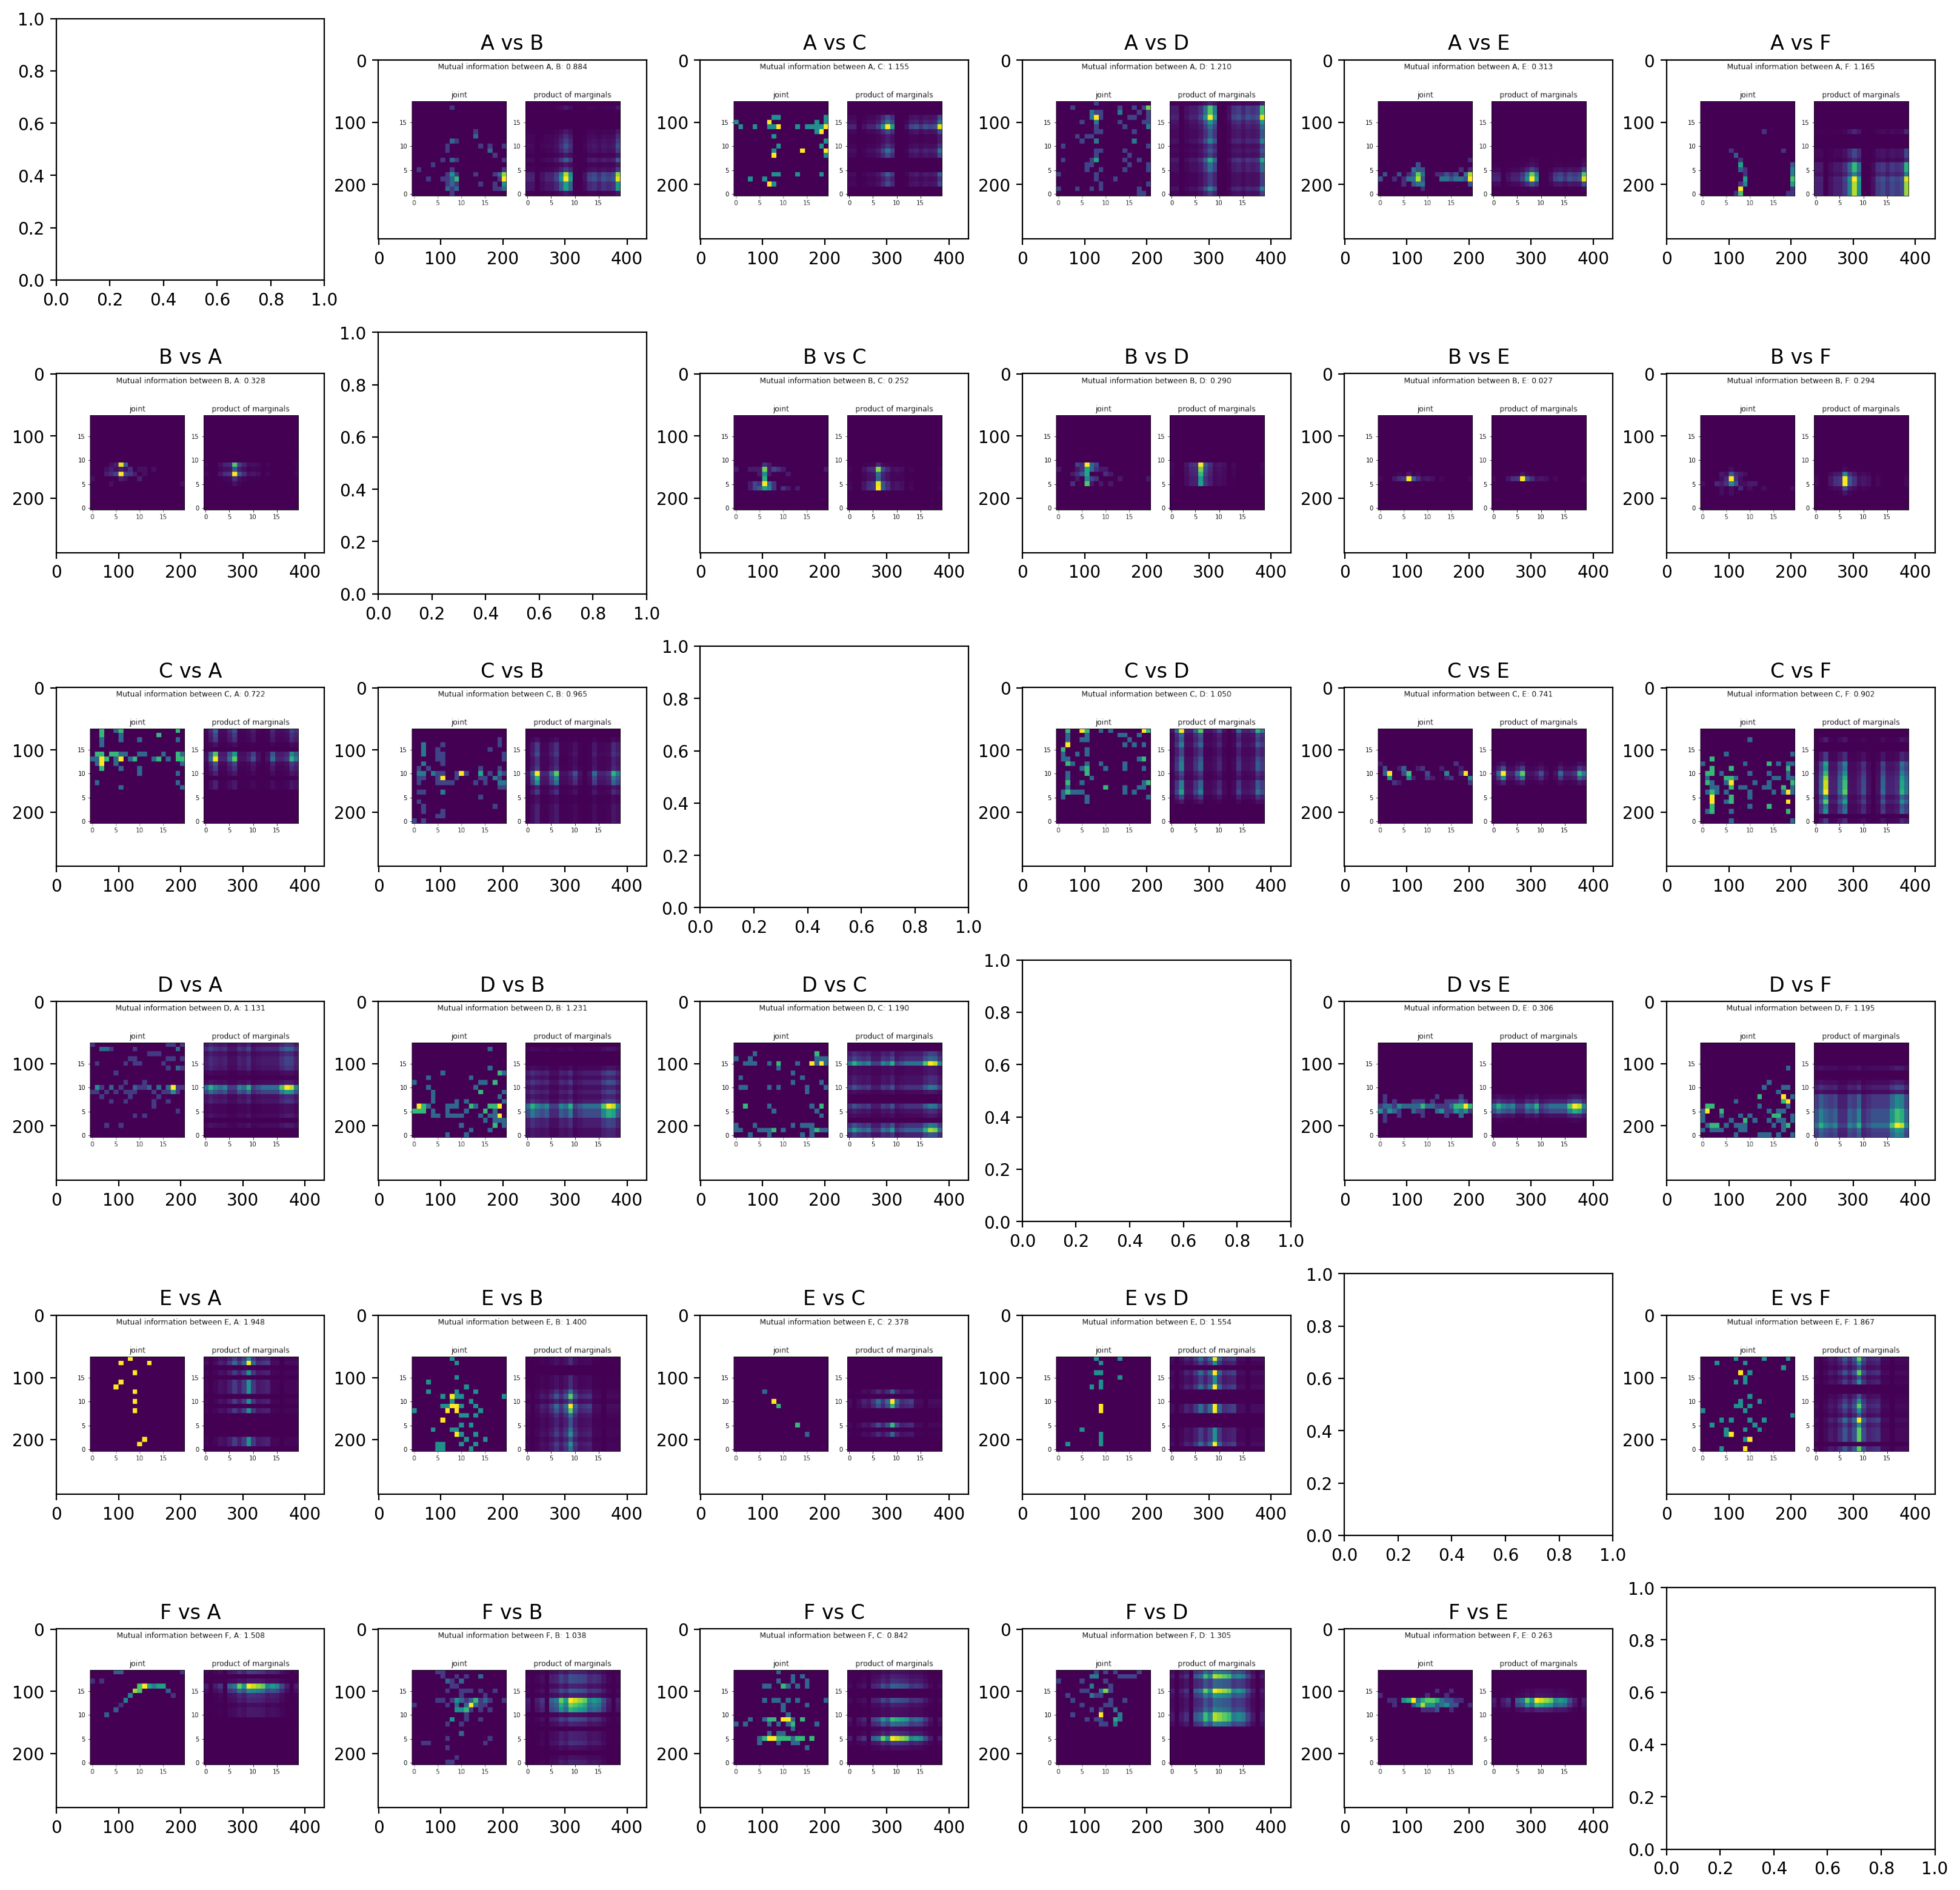

In [8]:
fig, axs = plt.subplots(n_vars,n_vars,figsize=(20,20),dpi=200)

for i,axs_i in enumerate(axs):
    for j,ax in enumerate(axs_i):
        if i != j:
            ax.imshow(plt.imread(f'./img/{vars[i]}-{vars[j]}.png'))
            ax.set_title(f'{vars[i]} vs {vars[j]}')